# Milestone-4      AutoEncoder Deep learning Approach

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Tasks of Milestone - 4
* Data Preprocessing
* Anomaly Detection with Auto encoders
* visualization of results when using AutoEncoder approach   



## Read the data

In [2]:
# Preprocessed dataset
org_df=pd.read_csv('/content/preprocessed.csv')
org_df.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,MD,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,99223,N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,MD,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,G0202,N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,99348,N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,81002,N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,96372,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


In [3]:
org_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Credentials of the Provider                               100000 non-null  object 
 1   Gender of the Provider                                    100000 non-null  object 
 2   Entity Type of the Provider                               100000 non-null  object 
 3   City of the Provider                                      100000 non-null  object 
 4   State Code of the Provider                                100000 non-null  object 
 5   Country Code of the Provider                              100000 non-null  object 
 6   Provider Type                                             100000 non-null  object 
 7   Medicare Participation Indicator                          100000 non-null  object 
 8   Place

In [4]:
# Make a copy of original data for the visualization
df=org_df.copy()

## 1 - Data Preprocessing

In [5]:
columns=['Credentials of the Provider', 'Gender of the Provider',
       'Entity Type of the Provider', 'City of the Provider',
       'State Code of the Provider', 'Country Code of the Provider',
       'Provider Type', 'Medicare Participation Indicator', 'Place of Service',
       'HCPCS Code', 'HCPCS Drug Indicator']
for i in columns:
    if org_df[i].nunique() >5:
        print(f"categorical values in {i} :",org_df[i].nunique())
print("\n")
for i in columns:
    if org_df[i].nunique() <5:
        print(f"categorical values in {i} :",org_df[i].nunique())

categorical values in Credentials of the Provider : 1539
categorical values in City of the Provider : 5846
categorical values in State Code of the Provider : 58
categorical values in Provider Type : 90
categorical values in HCPCS Code : 2631


categorical values in Gender of the Provider : 3
categorical values in Entity Type of the Provider : 2
categorical values in Country Code of the Provider : 4
categorical values in Medicare Participation Indicator : 2
categorical values in Place of Service : 2
categorical values in HCPCS Drug Indicator : 2


# Frequency encoding of columns which having more than two categorical values

In [6]:
# Columns to be frequency encoded
frequency_encode_cols = ['Credentials of the Provider', 'City of the Provider','State Code of the Provider',
                         'Provider Type', 'HCPCS Code','Gender of the Provider','Country Code of the Provider']

# Function to perform frequency encoding
def frequency_encoding(df, columns):
    for column in columns:
        frequency = df[column].value_counts()
        df[column] = df[column].map(frequency)
    return df

# Apply frequency encoding
encoded_data = frequency_encoding(org_df, frequency_encode_cols)
encoded_data.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,73827,29105,I,500,1997,99994,11366,Y,F,1297,N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889
1,73827,29105,I,209,3725,99994,1028,Y,O,243,N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257
2,1915,66641,I,10,1403,99994,2027,Y,O,44,N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937
3,73827,66641,I,317,1997,99994,11366,Y,O,460,N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000
4,6176,66641,I,51,7263,99994,11366,Y,O,732,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576


# One Hot Encoding for binary categorical columns

In [7]:
cols=['Entity Type of the Provider','Medicare Participation Indicator','Place of Service',
'HCPCS Drug Indicator']

In [8]:
new_df=pd.get_dummies(encoded_data,columns=cols,dtype=float)
new_df.head()

,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,HCPCS Code,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,...,Average Medicare Payment Amount,Average Medicare Standardized Amount,Entity Type of the Provider_I,Entity Type of the Provider_O,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,Place of Service_F,Place of Service_O,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,73827,29105,500,1997,99994,11366,1297,27.0,24.0,27.0,...,157.262222,160.908889,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,73827,29105,209,3725,99994,1028,243,175.0,175.0,175.0,...,118.830000,135.315257,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1915,66641,10,1403,99994,2027,44,32.0,13.0,32.0,...,64.439688,60.595937,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,73827,66641,317,1997,99994,11366,460,20.0,18.0,20.0,...,3.430000,3.430000,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,6176,66641,51,7263,99994,11366,732,33.0,24.0,31.0,...,19.539394,19.057576,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


## Standardized the data

In [9]:
# Standardized the data
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

numerical_cols=new_df.iloc[:,:14].columns
scaled_data=ss.fit_transform(new_df[numerical_cols])
temp_df=pd.DataFrame(scaled_data,columns=new_df.iloc[:,:14].columns)
temp_df.head()

,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,HCPCS Code,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
0,0.594983,-1.211160,1.571686,-0.737342,0.007746,1.336743,0.397579,-0.085301,-0.059308,-0.070183,0.385450,-0.046433,0.400082,0.414299
1,0.594983,-1.211160,0.189180,-0.004973,0.007746,-0.940500,-0.439989,-0.025939,0.076775,0.020049,0.086673,0.182805,0.207649,0.286359
2,-1.684316,0.686478,-0.756245,-0.989093,0.007746,-0.720441,-0.598126,-0.083296,-0.069222,-0.067135,-0.041922,-0.187794,-0.064687,-0.087154
3,0.594983,0.686478,0.702275,-0.737342,0.007746,1.336743,-0.267549,-0.088109,-0.064716,-0.074451,-0.380709,-0.328957,-0.370166,-0.372921
4,-1.549260,0.686478,-0.561459,1.494517,0.007746,1.336743,-0.051402,-0.082895,-0.059308,-0.067744,-0.291221,-0.296019,-0.289505,-0.294800


In [10]:
# creating final transformed dataset after scaling
scaled_df=temp_df.join(new_df.iloc[:,14:])
scaled_df.head()

,Credentials of the Provider,Gender of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,HCPCS Code,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,...,Average Medicare Payment Amount,Average Medicare Standardized Amount,Entity Type of the Provider_I,Entity Type of the Provider_O,Medicare Participation Indicator_N,Medicare Participation Indicator_Y,Place of Service_F,Place of Service_O,HCPCS Drug Indicator_N,HCPCS Drug Indicator_Y
0,0.594983,-1.211160,1.571686,-0.737342,0.007746,1.336743,0.397579,-0.085301,-0.059308,-0.070183,...,0.400082,0.414299,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.594983,-1.211160,0.189180,-0.004973,0.007746,-0.940500,-0.439989,-0.025939,0.076775,0.020049,...,0.207649,0.286359,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,-1.684316,0.686478,-0.756245,-0.989093,0.007746,-0.720441,-0.598126,-0.083296,-0.069222,-0.067135,...,-0.064687,-0.087154,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,0.594983,0.686478,0.702275,-0.737342,0.007746,1.336743,-0.267549,-0.088109,-0.064716,-0.074451,...,-0.370166,-0.372921,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,-1.549260,0.686478,-0.561459,1.494517,0.007746,1.336743,-0.051402,-0.082895,-0.059308,-0.067744,...,-0.289505,-0.294800,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [11]:
scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 22 columns):
 #   Column                                                    Non-Null Count   Dtype  
---  ------                                                    --------------   -----  
 0   Credentials of the Provider                               100000 non-null  float64
 1   Gender of the Provider                                    100000 non-null  float64
 2   City of the Provider                                      100000 non-null  float64
 3   State Code of the Provider                                100000 non-null  float64
 4   Country Code of the Provider                              100000 non-null  float64
 5   Provider Type                                             100000 non-null  float64
 6   HCPCS Code                                                100000 non-null  float64
 7   Number of Services                                        100000 non-null  float64
 8   Numbe

# 2 - Auto Encoders -- Deep Learning

In [12]:
# spliting the data
from sklearn.model_selection import train_test_split
X_train,X_test=train_test_split(scaled_df,test_size=0.2,random_state=42)

## Model Building

In [13]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense
from keras import regularizers,optimizers
from keras.layers import Dropout

In [14]:
# Build the autoencoder model
input_dim = X_train.shape[1]
encoding_dim = 16
hidden_dim1 = int(encoding_dim / 2)
hidden_dim2 = int(encoding_dim / 2)
hidden_dim3 = int(encoding_dim / 2)

# Input layer
input_layer = Input(shape=(input_dim,))

# Encoding layer
encoder = Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_layer)
encoder = Dense(hidden_dim1, activation='relu')(encoder)
encoder = Dense(hidden_dim2, activation='relu')(encoder)
encoder = Dense(hidden_dim3, activation='relu')(encoder)
encoder = Dropout(0.2)(encoder)

# # Bottleneck layer
# bottleneck = Dense(encoding_dim, activation='relu')(encoder)

# Decoding layer
decoder = Dense(hidden_dim2, activation='relu')(encoder)
decoder = Dense(hidden_dim1, activation='relu')(decoder)
decoder = Dense(encoding_dim, activation='relu')(decoder)
decoder = Dense(input_dim, activation='sigmoid')(decoder)

# Autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [15]:
# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

In [16]:
# summary of the model
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 22)]              0         
                                                                 
 dense (Dense)               (None, 16)                368       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_4 (Dense)             (None, 8)                 72    

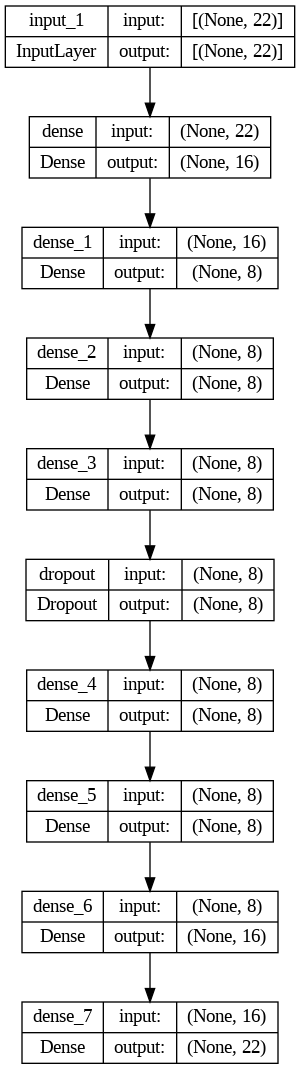

In [17]:
# plot the model
import tensorflow as tf
tf.keras.utils.plot_model(autoencoder, to_file='model.png',show_shapes=True)

In [18]:
# Train the autoencoder
history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=32, shuffle=True, validation_data=(X_test, X_test), verbose=1)


Epoch 1/100
2500/2500 [==============================] - 12s 4ms/step - loss: 0.6085 - mse: 0.6074 - val_loss: 0.5630 - val_mse: 0.5620
Epoch 2/100
2500/2500 [==============================] - 12s 5ms/step - loss: 0.5625 - mse: 0.5617 - val_loss: 0.5544 - val_mse: 0.5536
Epoch 3/100
2500/2500 [==============================] - 11s 5ms/step - loss: 0.5563 - mse: 0.5556 - val_loss: 0.5508 - val_mse: 0.5501
Epoch 4/100
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5539 - mse: 0.5533 - val_loss: 0.5515 - val_mse: 0.5509
Epoch 5/100
2500/2500 [==============================] - 11s 4ms/step - loss: 0.5507 - mse: 0.5501 - val_loss: 0.5501 - val_mse: 0.5496
Epoch 6/100
2500/2500 [==============================] - 11s 4ms/step - loss: 0.5481 - mse: 0.5476 - val_loss: 0.5496 - val_mse: 0.5491
Epoch 7/100
2500/2500 [==============================] - 10s 4ms/step - loss: 0.5467 - mse: 0.5462 - val_loss: 0.5462 - val_mse: 0.5457
Epoch 8/100
2500/2500 [=========================

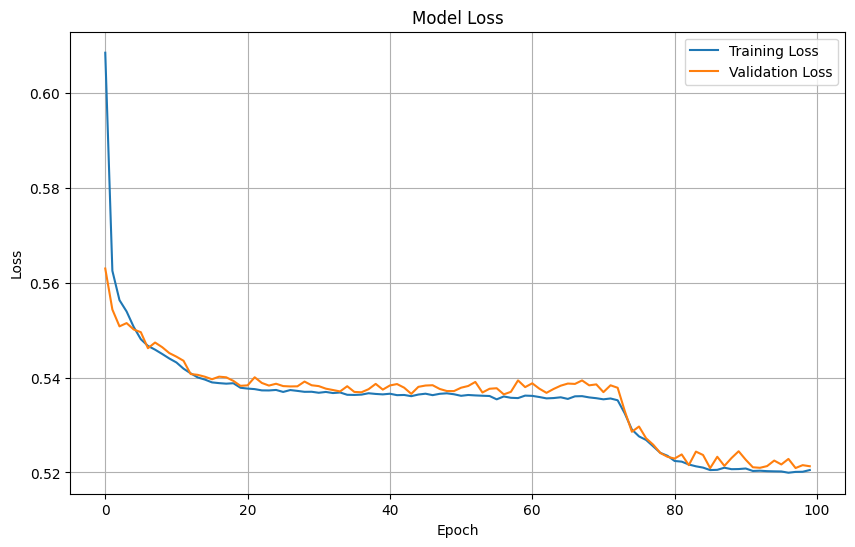

In [19]:
# Plot the training loss and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [20]:
# Predict the reconstruction
y_pred = autoencoder.predict(scaled_df.values)

3125/3125 [==============================] - 6s 2ms/step


In [21]:
y_pred.shape, scaled_df.shape

((100000, 22), (100000, 22))

In [22]:
y_pred

array([[1.8186918e-12, 0.0000000e+00, 9.9999946e-01, ..., 4.8804933e-09,
        1.0000000e+00, 9.1591036e-15],
       [5.4847018e-20, 0.0000000e+00, 0.0000000e+00, ..., 9.9999821e-01,
        1.0000000e+00, 0.0000000e+00],
       [1.4770133e-23, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [3.8552137e-11, 0.0000000e+00, 9.9999893e-01, ..., 8.9694424e-10,
        1.0000000e+00, 5.8933674e-13],
       [6.7573482e-01, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [8.6119712e-21, 0.0000000e+00, 4.0032431e-36, ..., 9.9961191e-01,
        1.0000000e+00, 0.0000000e+00]], dtype=float32)

In [23]:
scaled_df.values

array([[ 0.5949835 , -1.21116044,  1.57168633, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5949835 , -1.21116044,  0.18918015, ...,  1.        ,
         1.        ,  0.        ],
       [-1.68431551,  0.68647828, -0.75624504, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.5949835 ,  0.68647828,  1.57168633, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5949835 , -1.21116044, -0.77524856, ...,  1.        ,
         1.        ,  0.        ],
       [ 0.5949835 , -1.21116044, -0.4759431 , ...,  1.        ,
         1.        ,  0.        ]])

In [24]:
# Calculate the reconstruction error
mse = np.mean(np.power(scaled_df.values -  y_pred, 2), axis=1)

In [25]:
# Determine the threshold for anomaly detection
threshold = np.percentile(mse, 98)

In [26]:
# Classify anomalies
y_predict = mse > threshold

In [27]:
y_predict.shape

(100000,)

In [28]:
# creating a new columns for the Anomaly labels
df['Anomaly']=y_predict

In [29]:
# To get the rows which are anomalous
df[y_predict==1]

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Anomaly
72,MD,F,I,PUYALLUP,WA,US,Neurology,Y,O,95811,N,42.0,40.0,42.0,667.010000,5421.000000,517.969286,515.000000,True
120,MD,M,I,WINCHESTER,VA,US,Hematology-Oncology,Y,O,J1439,Y,15000.0,12.0,20.0,1.060300,3.900000,0.829990,0.829990,True
122,MD,M,I,MORRISTOWN,NJ,US,Orthopedic Surgery,Y,F,27130,N,31.0,31.0,31.0,1529.400000,8700.000000,1522.478065,1071.254193,True
175,MD,F,I,PRINCETON,NJ,US,Obstetrics & Gynecology,Y,F,57425,N,17.0,17.0,17.0,999.848235,2144.000000,727.914706,746.780000,True
221,MD,M,I,SPRINGFIELD,MO,US,Neurosurgery,Y,F,22551,N,13.0,13.0,13.0,1686.694615,6785.660000,1230.850769,1430.163077,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99864,DO,M,I,DAYTON,OH,US,Orthopedic Surgery,Y,F,27447,N,54.0,52.0,54.0,1288.477407,4919.703704,984.771852,1110.829630,True
99872,MD,M,I,PITTSBURGH,PA,US,Rheumatology,Y,O,J0717,Y,43000.0,14.0,113.0,7.481456,8.000000,5.849021,5.849021,True
99914,MD,O,O,PINOLE,CA,US,Ambulatory Surgical Center,Y,F,0191T,N,34.0,25.0,34.0,3605.580000,8500.000000,2826.770000,2073.857059,True
99927,MD,M,I,SAN BERNARDINO,CA,US,Cardiac Surgery,Y,F,33533,N,11.0,11.0,11.0,1677.116364,5344.800000,1283.260909,1334.323636,True


In [40]:
# assign labels as 'normal' and 'anomalous' for Normal and Anomalous data points
df=df.replace({True:'anomalous',False:'normal'})
df.head()

,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,City of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount,Anomaly
0,MD,F,I,SAINT LOUIS,MO,US,Internal Medicine,Y,F,99223,N,27.0,24.0,27.0,200.587778,305.211111,157.262222,160.908889,normal
1,MD,F,I,FAYETTEVILLE,NC,US,Obstetrics & Gynecology,Y,O,G0202,N,175.0,175.0,175.0,123.730000,548.800000,118.830000,135.315257,normal
2,DPM,M,I,NORTH HAVEN,CT,US,Podiatry,Y,O,99348,N,32.0,13.0,32.0,90.650000,155.000000,64.439688,60.595937,normal
3,MD,M,I,KANSAS CITY,MO,US,Internal Medicine,Y,O,81002,N,20.0,18.0,20.0,3.500000,5.000000,3.430000,3.430000,normal
4,DO,M,I,JUPITER,FL,US,Internal Medicine,Y,O,96372,N,33.0,24.0,31.0,26.520000,40.000000,19.539394,19.057576,normal


## Visualizations

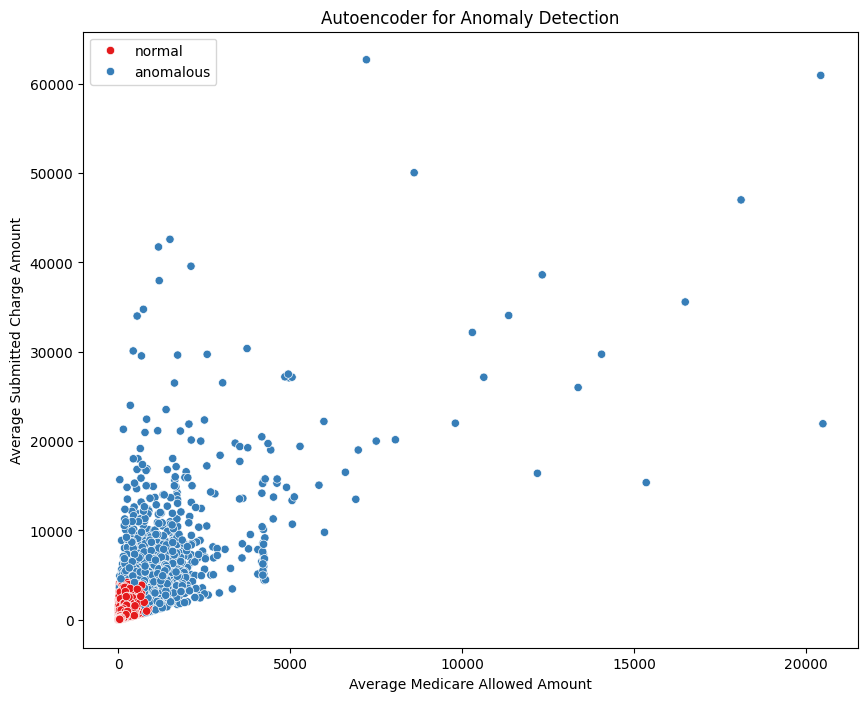

In [31]:
# Plot the data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Average Medicare Allowed Amount', y='Average Submitted Charge Amount', data=df, hue='Anomaly', palette='Set1')
plt.title('Autoencoder for Anomaly Detection')
plt.xlabel('Average Medicare Allowed Amount')
plt.ylabel ('Average Submitted Charge Amount')
plt.legend()
plt.show()

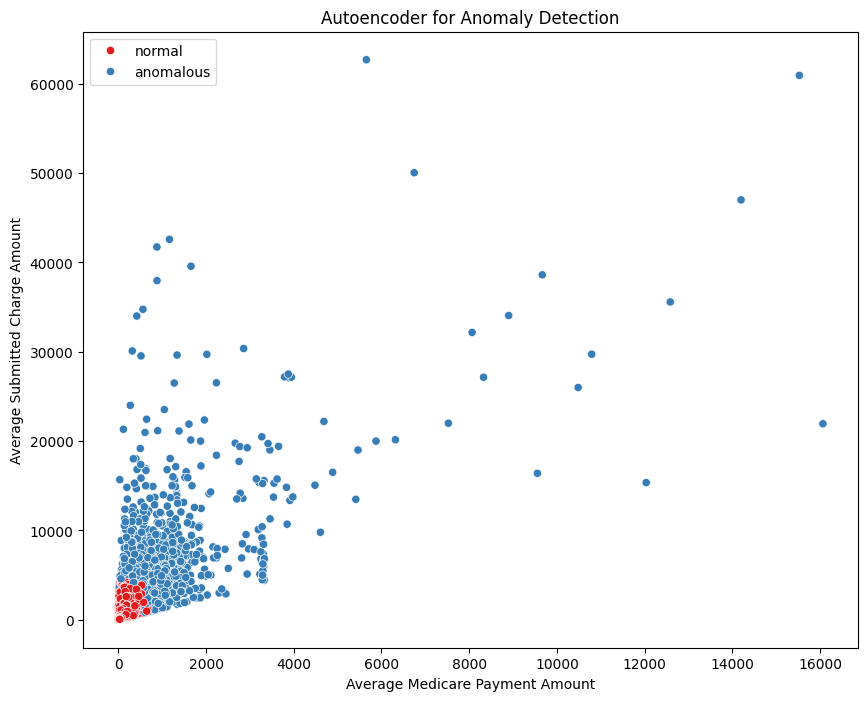

In [32]:
# Plot the data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Average Medicare Payment Amount', y='Average Submitted Charge Amount', data=df, hue='Anomaly', palette='Set1')
plt.title('Autoencoder for Anomaly Detection')
plt.xlabel('Average Medicare Payment Amount')
plt.ylabel ('Average Submitted Charge Amount')
plt.legend()
plt.show()

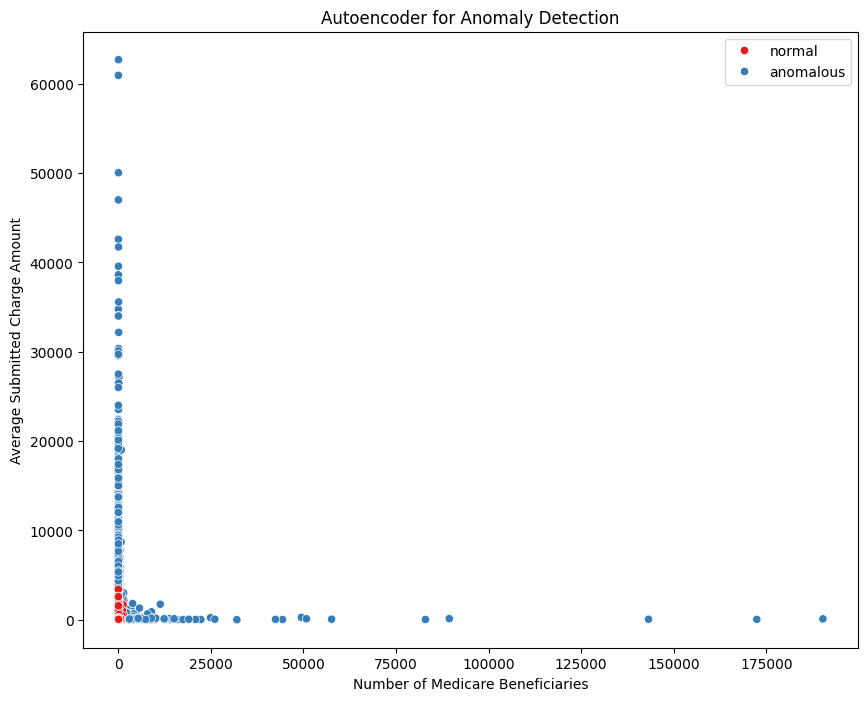

In [33]:
# Plot the data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Number of Medicare Beneficiaries', y='Average Submitted Charge Amount', data=df, hue='Anomaly', palette='Set1')
plt.title('Autoencoder for Anomaly Detection')
plt.xlabel('Number of Medicare Beneficiaries')
plt.ylabel ('Average Submitted Charge Amount')
plt.legend()
plt.show()



*   Above scatter plots are between the different  numerical columns.
*   These plot shows the normal and anamalous datapoints as we can see in the plots.



**Visualization for categorical features**

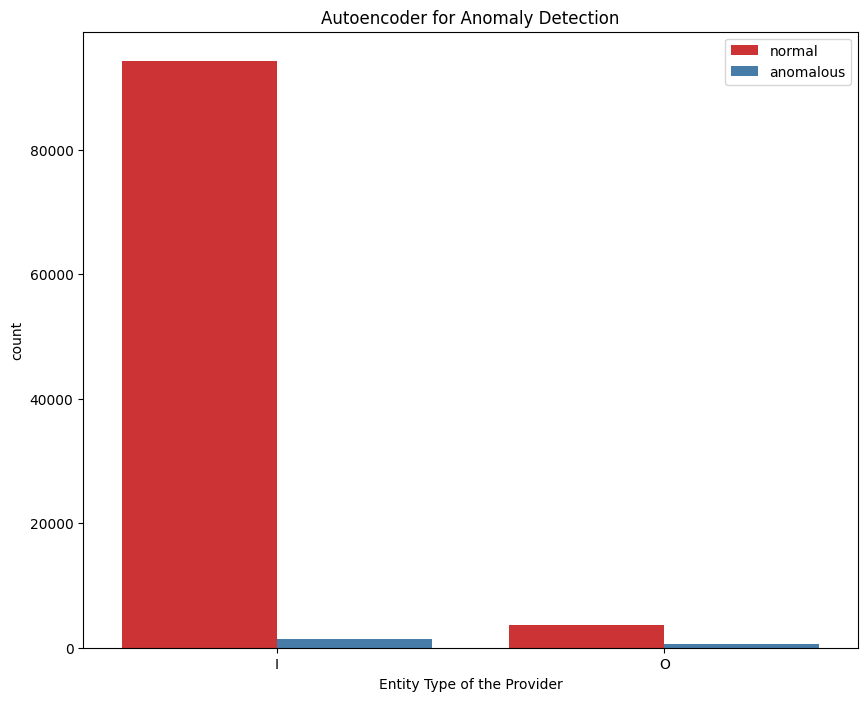

Entity Type of the Provider
I    1472
O     528
Name: count, dtype: int64

In [34]:
# Plot the data
plt.figure(figsize=(10, 8))
sns.countplot(x='Entity Type of the Provider', data=df, hue='Anomaly', palette='Set1')
plt.title('Autoencoder for Anomaly Detection')
plt.xlabel('Entity Type of the Provider')
plt.legend()
plt.show()

# for the value counts of different categories
df[y_predict==1]['Entity Type of the Provider'].value_counts()


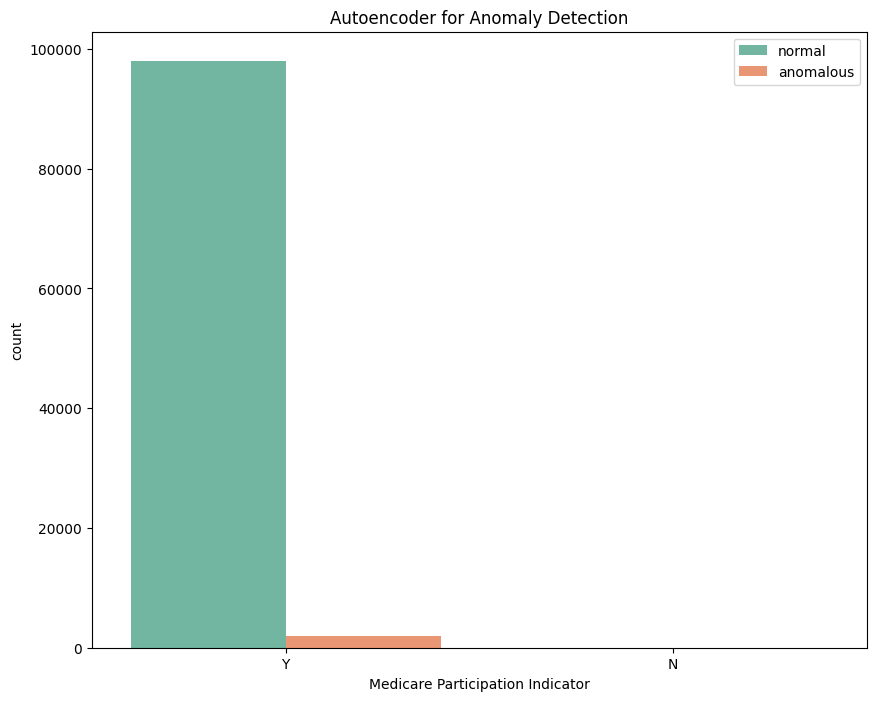

Medicare Participation Indicator
Y    1999
N       1
Name: count, dtype: int64

In [35]:
# Plot the data
plt.figure(figsize=(10, 8))
sns.countplot(x='Medicare Participation Indicator', data=df, hue='Anomaly', palette='Set2')
plt.title('Autoencoder for Anomaly Detection')
plt.xlabel('Medicare Participation Indicator')
plt.legend()
plt.show()

# for the value counts of different categories
df[y_predict==1]['Medicare Participation Indicator'].value_counts()


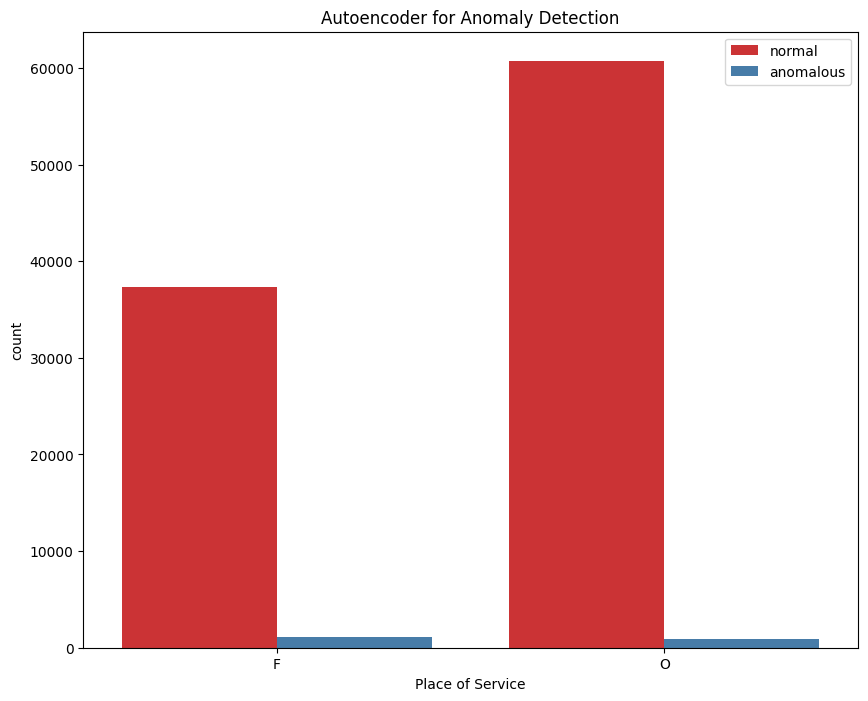

Place of Service
F    1101
O     899
Name: count, dtype: int64

In [36]:
# Plot the data
plt.figure(figsize=(10, 8))
sns.countplot(x='Place of Service', data=df, hue='Anomaly', palette='Set1')
plt.title('Autoencoder for Anomaly Detection')
plt.xlabel('Place of Service')
plt.legend()
plt.show()

# for the value counts of different categories
df[y_predict==1]['Place of Service'].value_counts()


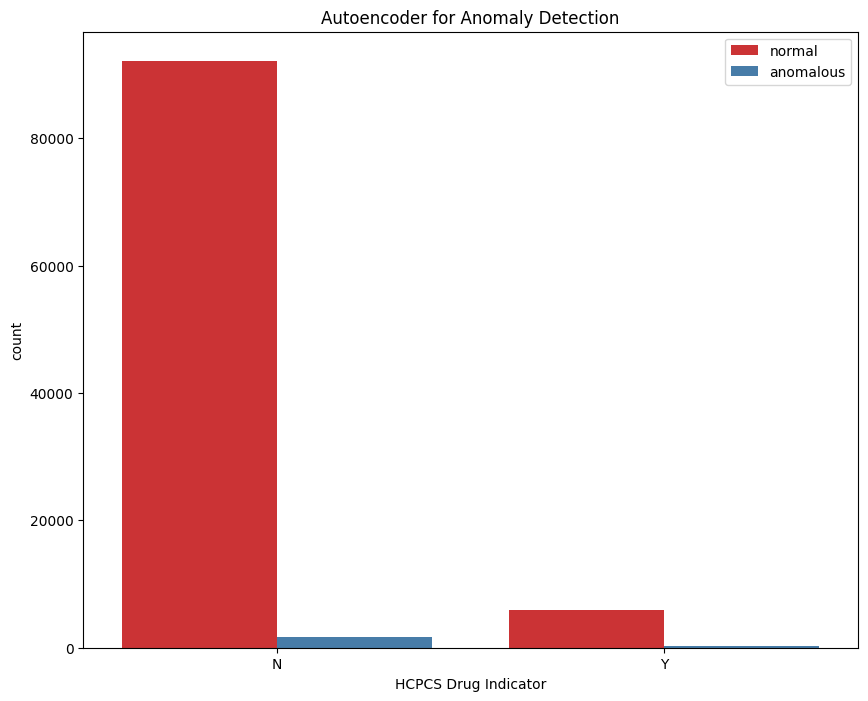

HCPCS Drug Indicator
N    1669
Y     331
Name: count, dtype: int64

In [37]:
# Plot the data
plt.figure(figsize=(10, 8))
sns.countplot(x='HCPCS Drug Indicator', data=df, hue='Anomaly', palette='Set1')
plt.title('Autoencoder for Anomaly Detection')
plt.xlabel('HCPCS Drug Indicator')
plt.legend()
plt.show()

# for the value counts of different categories
df[y_predict==1]['HCPCS Drug Indicator'].value_counts()


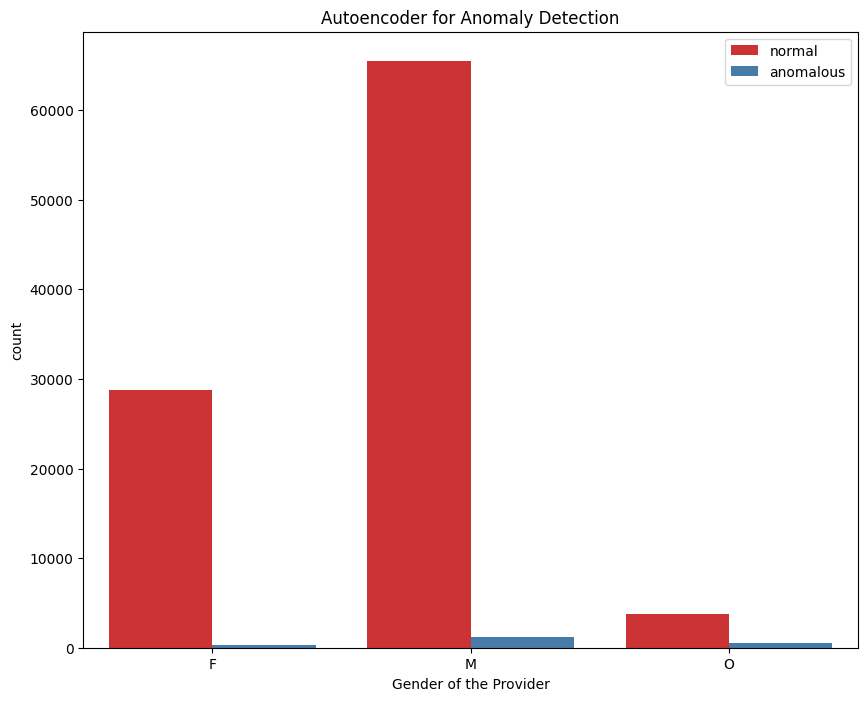

Gender of the Provider
M    1172
O     528
F     300
Name: count, dtype: int64

In [38]:
# Plot the data
plt.figure(figsize=(10, 8))
sns.countplot(x='Gender of the Provider', data=df, hue='Anomaly', palette='Set1')
plt.title('Autoencoder for Anomaly Detection')
plt.xlabel('Gender of the Provider')
plt.legend()
plt.show()

# for the value counts of different categories
df[y_predict==1]['Gender of the Provider'].value_counts()



*   Above plot shows the different count of catogorical features such as Gender of the provider, Provider Type, Place of service etc.
*   These count plot clearly shows the count of normal data points and anomalous datapoints for different  categorical features.

